## Car prices in Poland - Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('Car_Prices_Poland_Kaggle.csv', index_col=0)
data.head()

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


##### Basic informations about data 

In [4]:
data.shape

(117927, 10)

In [5]:
data.columns

Index(['mark', 'model', 'generation_name', 'year', 'mileage', 'vol_engine',
       'fuel', 'city', 'province', 'price'],
      dtype='object')

In [6]:
data.describe().round()

,year,mileage,vol_engine,price
count,117927.0,117927.0,117927.0,117927.0
mean,2013.0,140977.0,1812.0,70300.0
std,6.0,92369.0,644.0,84825.0
min,1945.0,0.0,0.0,500.0
25%,2009.0,67000.0,1461.0,21000.0
50%,2013.0,146269.0,1796.0,41900.0
75%,2018.0,203000.0,1995.0,83600.0
max,2022.0,2800000.0,7600.0,2399900.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117927 entries, 0 to 117926
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   mark             117927 non-null  object
 1   model            117927 non-null  object
 2   generation_name  87842 non-null   object
 3   year             117927 non-null  int64 
 4   mileage          117927 non-null  int64 
 5   vol_engine       117927 non-null  int64 
 6   fuel             117927 non-null  object
 7   city             117927 non-null  object
 8   province         117927 non-null  object
 9   price            117927 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 9.9+ MB


In [8]:
data = data.drop(['generation_name'], axis=1)  ## removing column with huge amounth of missing values 

In [9]:
data.shape

(117927, 9)

#### Mark variable analysis 

In [10]:
pd.DataFrame(data.mark.value_counts()).head(10) ## Top 10 marks in dataset 

,mark
audi,12031
opel,11914
bmw,11070
volkswagen,10848
ford,9664
mercedes-benz,7136
renault,6976
skoda,5888
toyota,5120
peugeot,5056


In [11]:
(print('Number of unique categorical values in mark column =', len(data['mark'].unique())))

Number of unique categorical values in mark column = 23


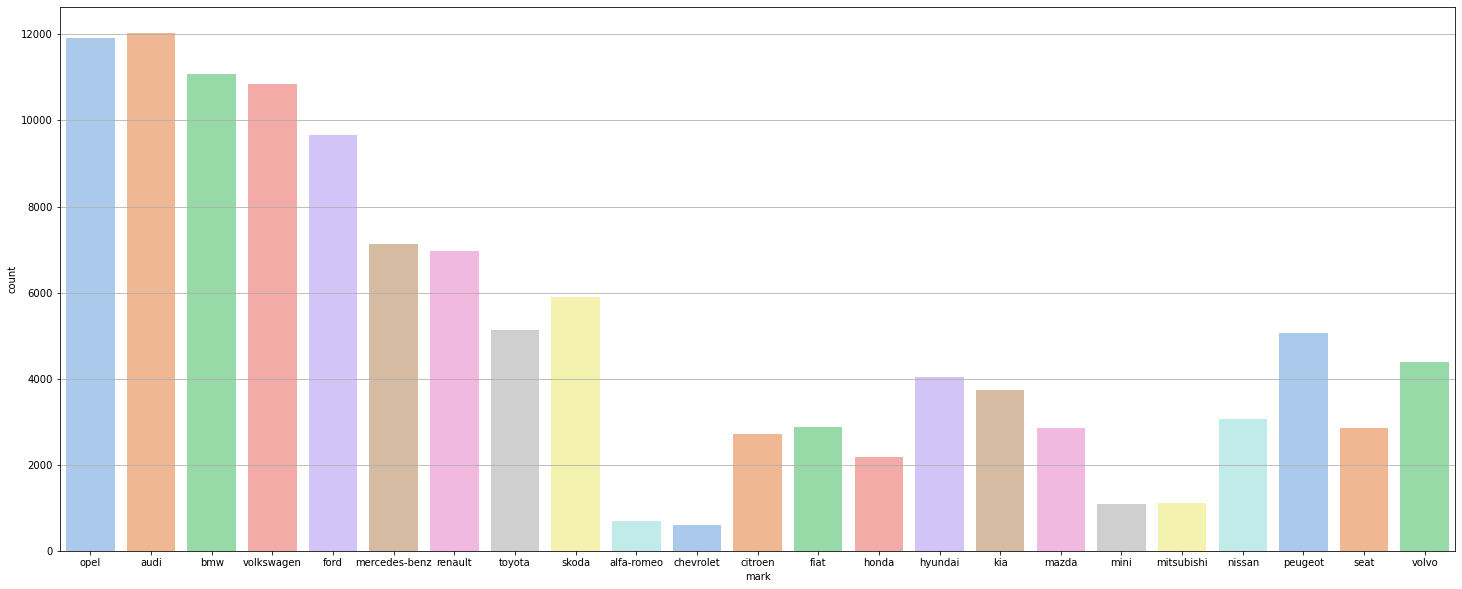

In [12]:
plt.figure(figsize=[25,10])
plt.grid(True)
sns.countplot(data.mark, palette='pastel')
plt.show()

#### Model variable analysis 

In [13]:
model_list = data.model.value_counts() 
model_list

astra       3331
seria-3     2944
a4          2912
golf        2592
a6          2496
            ... 
fluence       32
karl          27
omega         20
frontera      18
ampera        10
Name: model, Length: 328, dtype: int64

In [14]:
print('Number of unique categorical values in model column =', len(data['model'].unique()))

Number of unique categorical values in model column = 328


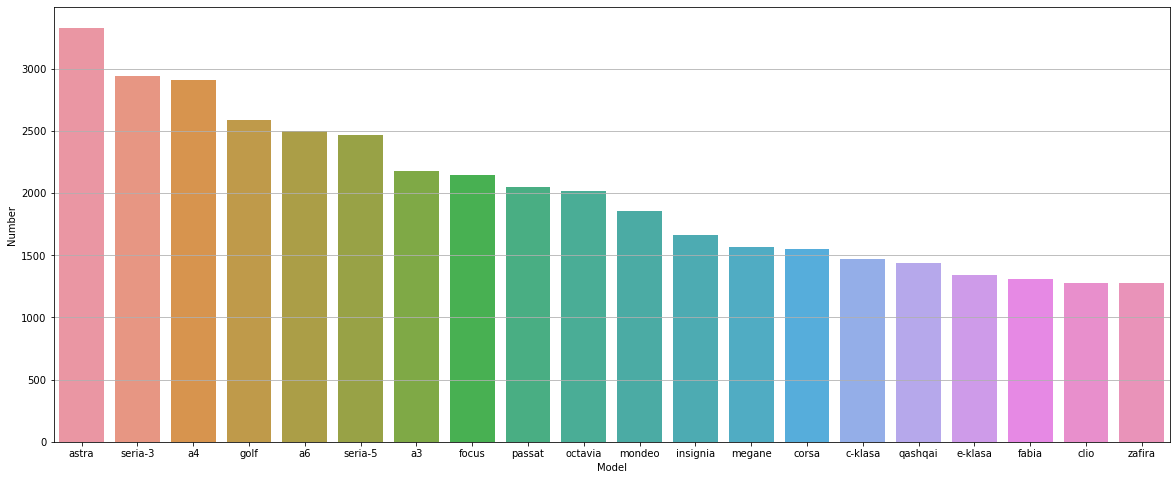

In [15]:
model_list = data.model.value_counts().rename_axis('Model').reset_index(name='Number')

plt.figure(figsize=[20,8])
plt.grid(True)
sns.barplot(model_list.Model[:20], model_list.Number[:20])
plt.show()

#### Year variable analysis

In [16]:
data.year.describe().round(2)

count    117927.00
mean       2012.93
std           5.69
min        1945.00
25%        2009.00
50%        2013.00
75%        2018.00
max        2022.00
Name: year, dtype: float64

In [17]:
data['year'].value_counts()[:20]

2021    10559
2017     8909
2018     8647
2016     7021
2009     6828
2011     6596
2008     6528
2010     6400
2012     6240
2015     6021
2014     5790
2007     5735
2013     5445
2019     5200
2006     4755
2005     3534
2020     3526
2004     2641
2022     2094
2003     1766
Name: year, dtype: int64

In [18]:
data.groupby(['year']).mean().round().iloc[31:]

,mileage,vol_engine,price
year,,,
2000,238477.0,2160.0,11999.0
2001,239231.0,2053.0,11707.0
2002,227815.0,2048.0,12723.0
2003,233415.0,2016.0,13376.0
2004,231165.0,2042.0,14901.0
2005,224396.0,1991.0,15876.0
2006,217876.0,1946.0,17634.0
2007,217061.0,1937.0,19739.0
2008,208791.0,1884.0,22258.0


In [19]:
year_2000_2021 = data.groupby(['year']).mean().round().iloc[31:]
year_2000_2021 = year_2000_2021.rename_axis('Year').reset_index()
year_2000_2021

,Year,mileage,vol_engine,price
0,2000,238477.0,2160.0,11999.0
1,2001,239231.0,2053.0,11707.0
2,2002,227815.0,2048.0,12723.0
3,2003,233415.0,2016.0,13376.0
4,2004,231165.0,2042.0,14901.0
5,2005,224396.0,1991.0,15876.0
6,2006,217876.0,1946.0,17634.0
7,2007,217061.0,1937.0,19739.0
8,2008,208791.0,1884.0,22258.0
9,2009,194696.0,1772.0,24130.0


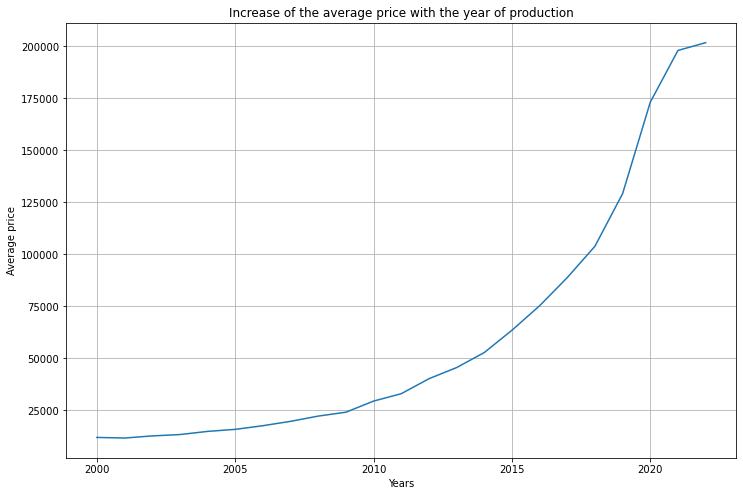

In [20]:
plt.figure(figsize=[12,8])
plt.plot(year_2000_2021.Year, year_2000_2021.price)
plt.xlabel('Years')
plt.ylabel('Average price')
plt.title('Increase of the average price with the year of production')
plt.grid(True)
plt.show()

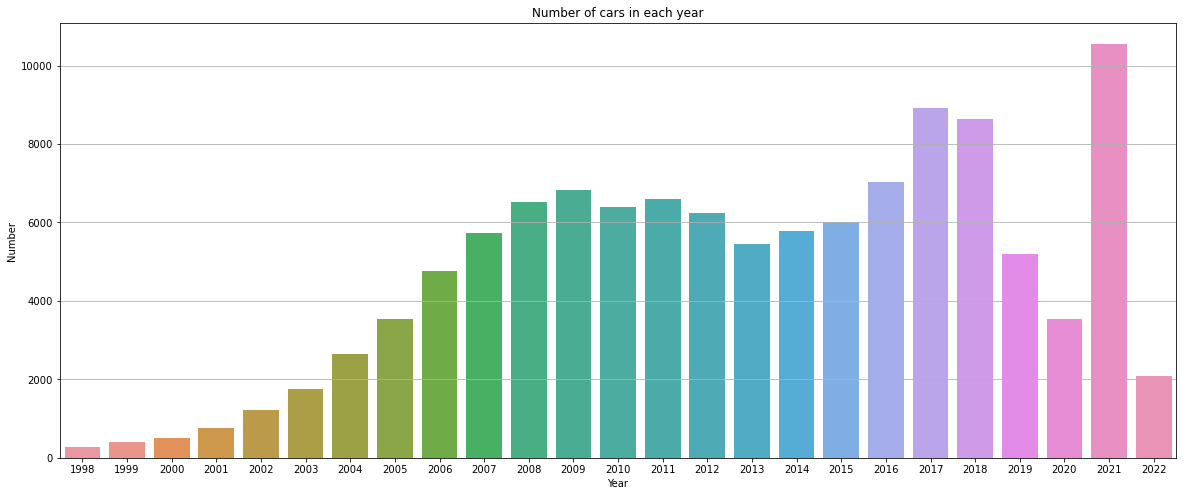

In [21]:
year_list = data.year.value_counts().rename_axis('Year').reset_index(name='Number')

plt.figure(figsize=[20,8])
plt.grid(True)
sns.barplot(year_list.Year[:25], year_list.Number[:25])
plt.title('Number of cars in each year')
plt.show()

#### Mileage variable analysis

In [22]:
data.mileage.describe().round()

count     117927.0
mean      140977.0
std        92369.0
min            0.0
25%        67000.0
50%       146269.0
75%       203000.0
max      2800000.0
Name: mileage, dtype: float64

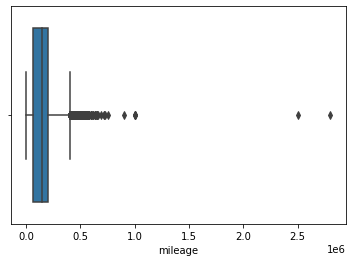

In [23]:
sns.boxplot(data.mileage)
plt.show()

In [24]:
data[data['mileage']==data['mileage'].max()]

,mark,model,year,mileage,vol_engine,fuel,city,province,price
55214,ford,tourneo-connect,2008,2800000,1753,Diesel,Legnica,Dolnośląskie,12300


In [25]:
data = data.drop(data.index[55214]) ## removing outlier 

In [26]:
data[data['mileage']==data['mileage'].max()]

,mark,model,year,mileage,vol_engine,fuel,city,province,price
53958,ford,mondeo,2014,2500000,1999,Hybrid,Poznań,Lubelskie,23800


In [27]:
data = data.drop(data.index[53958])  ## removing outlier 

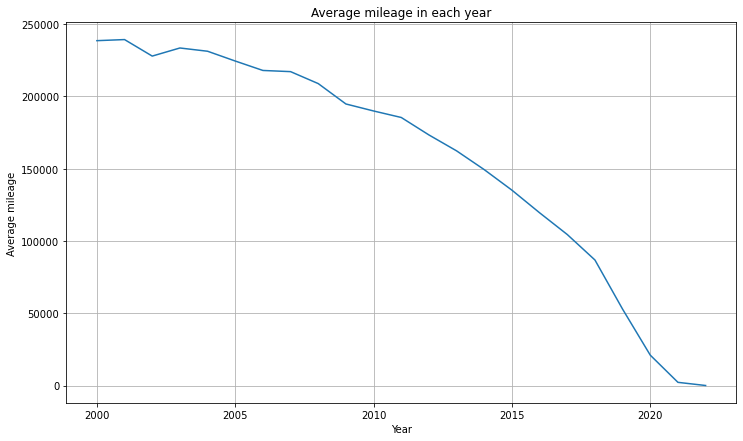

In [28]:
plt.figure(figsize=[12,7])
plt.plot(year_2000_2021.Year, year_2000_2021.mileage)
plt.xlabel('Year')
plt.ylabel('Average mileage')
plt.title('Average mileage in each year')
plt.grid(True)
plt.show()

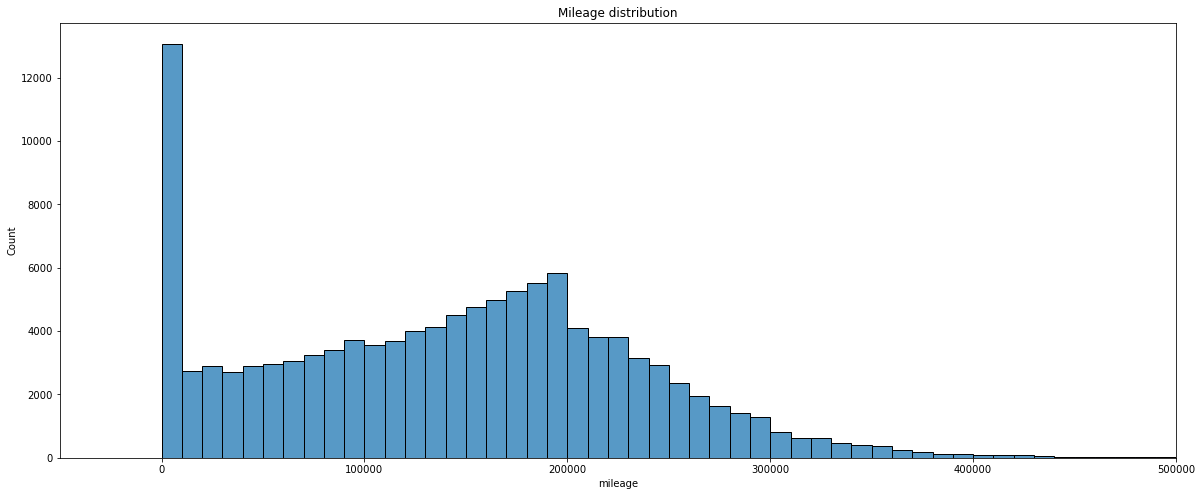

In [29]:
plt.figure(figsize=[20,8])
sns.histplot(data.mileage, bins=100)
plt.xlim(right = 500000)
plt.title('Mileage distribution')
plt.show()

In [30]:
np.sum(data.mileage == 0) # Checking if there is any car with 0 mileage 

373

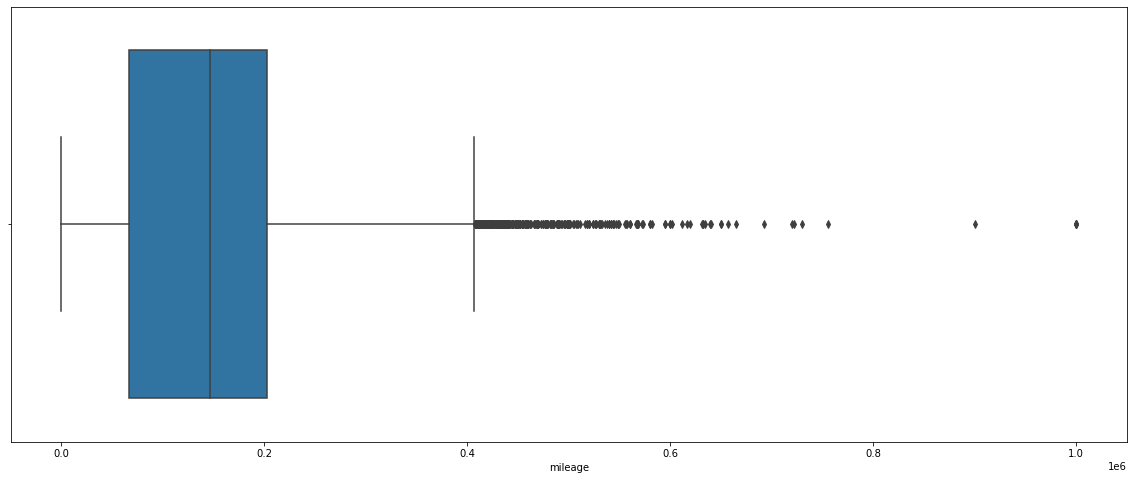

In [31]:
plt.figure(figsize=[20,8])
sns.boxplot(data.mileage)
plt.show()

#### Engine volume variable analysis

In [32]:
data.vol_engine.describe().round()

count    117925.0
mean       1812.0
std         644.0
min           0.0
25%        1461.0
50%        1796.0
75%        1995.0
max        7600.0
Name: vol_engine, dtype: float64

In [33]:
(data.vol_engine == 0).sum() # Checking if there is any car with 0 mileage

1248

In [34]:
data = data.drop(data[data.vol_engine == 0].index) ## Removing 0 values 

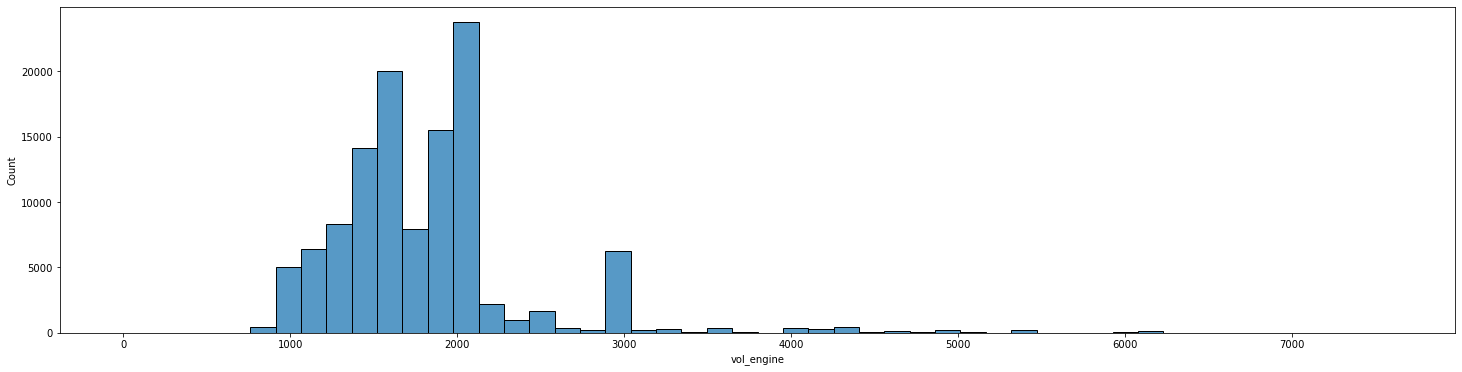

In [35]:
plt.figure(figsize=[25,6])
sns.histplot(data.vol_engine, bins=50)
plt.show()

In [36]:
np.sum(data.mileage == 0) # Checking if there is any car with 0 mileage for 2nd time - now is zero

0

####  Fuel variable analysis

In [37]:
data.fuel.value_counts()

Gasoline    61419
Diesel      48327
LPG          4299
Hybrid       2573
CNG            47
Electric       12
Name: fuel, dtype: int64

In [38]:
data.groupby(['fuel']).mean()

,year,mileage,vol_engine,price
fuel,,,,
CNG,2012.191489,182233.872340,1513.191489,30979.829787
Diesel,2012.918969,176293.190473,1973.830198,71321.391706
Electric,2018.916667,18651.333333,764.333333,136295.833333
Gasoline,2012.804214,115710.359530,1715.449405,65713.597144
Hybrid,2019.192771,40439.359114,1890.537505,167923.035367
LPG,2008.830658,201872.227262,1858.958362,26995.022796


In [39]:
print('Number of unique categorical values in fuel column =', len(data['fuel'].unique()))

Number of unique categorical values in fuel column = 6


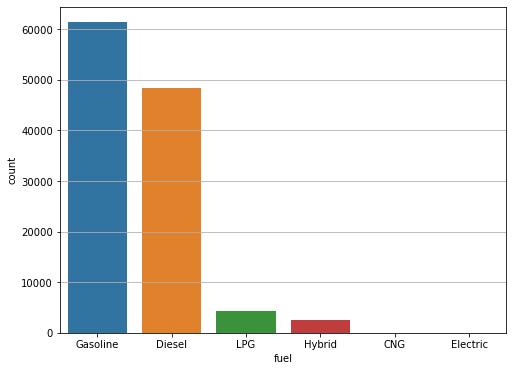

In [40]:
order=['Gasoline','Diesel','LPG','Hybrid','CNG','Electric']

plt.figure(figsize=[8,6])
plt.grid(True)
sns.countplot(data.fuel, order=order)

plt.show()

#### City variable analysis

In [41]:
data.city.value_counts().head(10)

Warszawa    7769
Łódź        3269
Kraków      2881
Wrocław     2660
Poznań      2317
Gdańsk      2219
Katowice    2190
Lublin      1827
Radom       1578
Szczecin    1431
Name: city, dtype: int64

In [42]:
print('Number of unique categorical values in city column =', len(data['city'].unique()))

Number of unique categorical values in city column = 4425


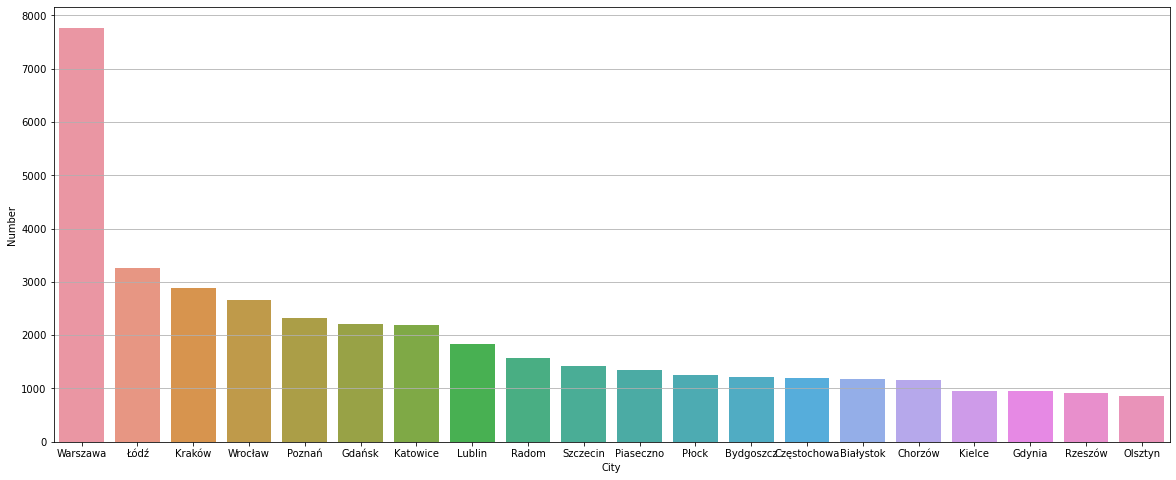

In [43]:
city_list = data.city.value_counts().rename_axis('City').reset_index(name='Number')

plt.figure(figsize=[20,8])
plt.grid(True)
sns.barplot(city_list.City[:20], city_list.Number[:20])
plt.show()

#### Province variable analysis

In [44]:
data.province.value_counts()

Mazowieckie                 21953
Śląskie                     16475
Wielkopolskie               13870
Małopolskie                  9667
Dolnośląskie                 8723
Łódzkie                      7803
Pomorskie                    7506
Kujawsko-pomorskie           5330
Lubelskie                    4725
Zachodniopomorskie           3922
Podkarpackie                 3519
Świętokrzyskie               3319
Warmińsko-mazurskie          2933
Lubuskie                     2732
Podlaskie                    2110
Opolskie                     2046
Moravian-Silesian Region       35
Berlin                          3
Wiedeń                          2
Niedersachsen                   1
(                               1
Trenczyn                        1
Nordrhein-Westfalen             1
Name: province, dtype: int64

In [45]:
## Removing object whit ones isn't provinces in Poland 

searchfor = ['Moravian-Silesian Region','Berlin','Wiedeń','Niedersachsen','(','Trenczyn','Nordrhein-Westfalen']

data = data.drop((data.loc[data['province'].isin(searchfor)].index), axis=0)

In [46]:
print('Number of unique categorical values in province column =', len(data['province'].unique()))

Number of unique categorical values in province column = 16


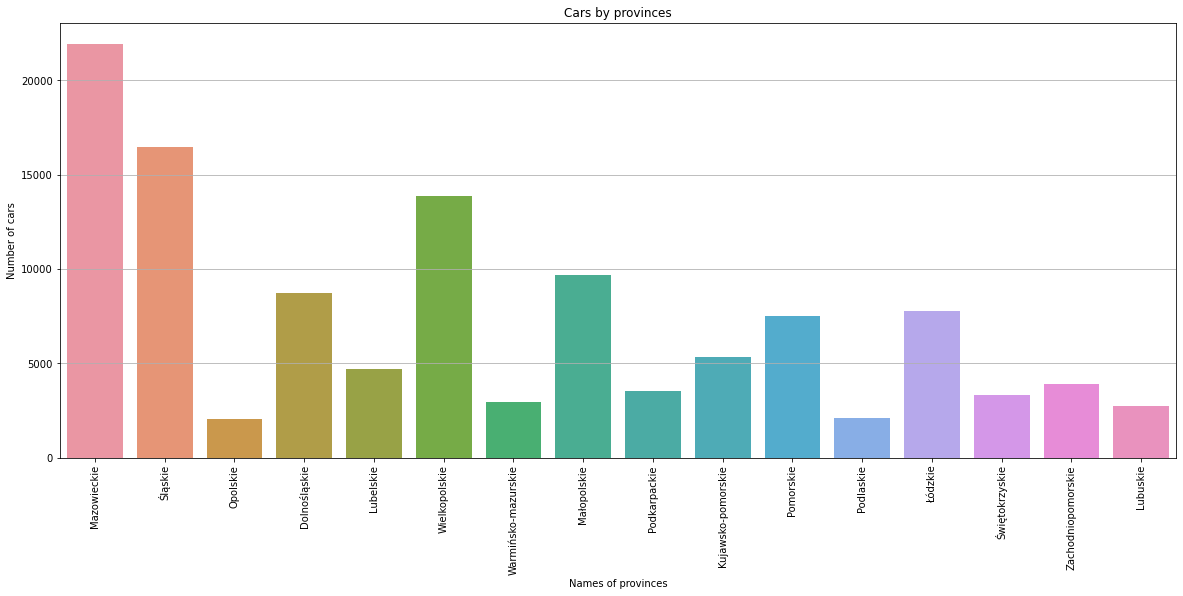

In [47]:
plt.figure(figsize=[20,8])
plt.grid(True)
sns.countplot(data.province)
plt.xticks(rotation=90)
plt.ylabel('Number of cars')
plt.xlabel('Names of provinces')
plt.title('Cars by provinces')
plt.show()

#### Price variable analysis 

In [48]:
data.price.describe().round(2)

count     116633.00
mean       68851.78
std        83250.95
min          500.00
25%        20900.00
50%        41000.00
75%        81500.00
max      2399900.00
Name: price, dtype: float64

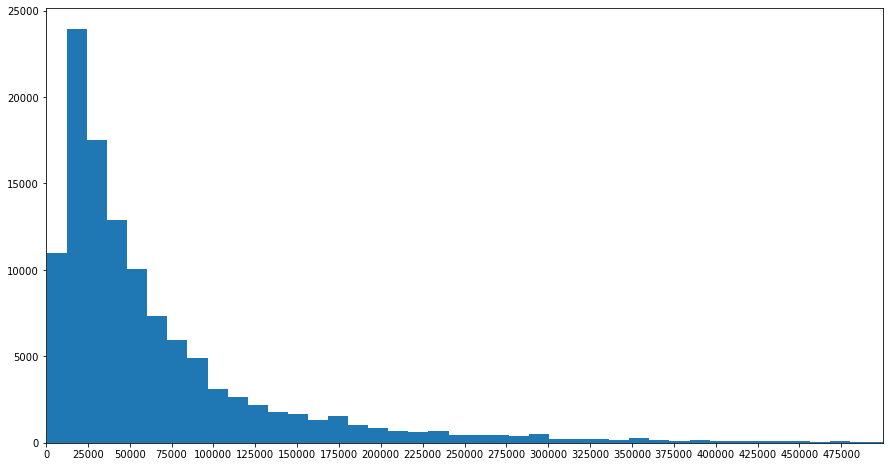

In [49]:
plt.figure(figsize=[15,8])
plt.hist(data.price, bins=200)
plt.xlim(0,500000)
plt.xticks(np.arange(0, 500000, step=25000))
plt.show()

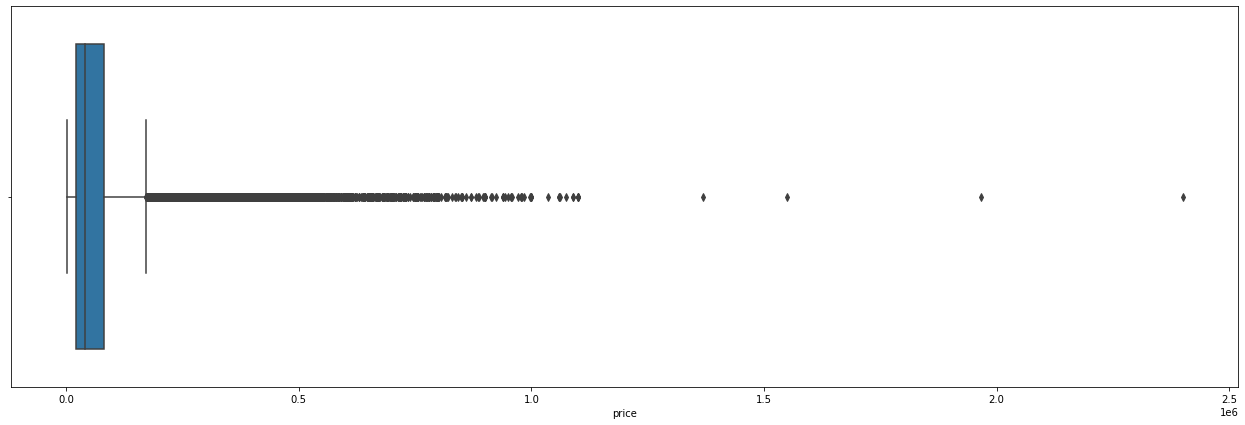

In [50]:
plt.figure(figsize=[22,7])
sns.boxplot(data.price)
plt.show()

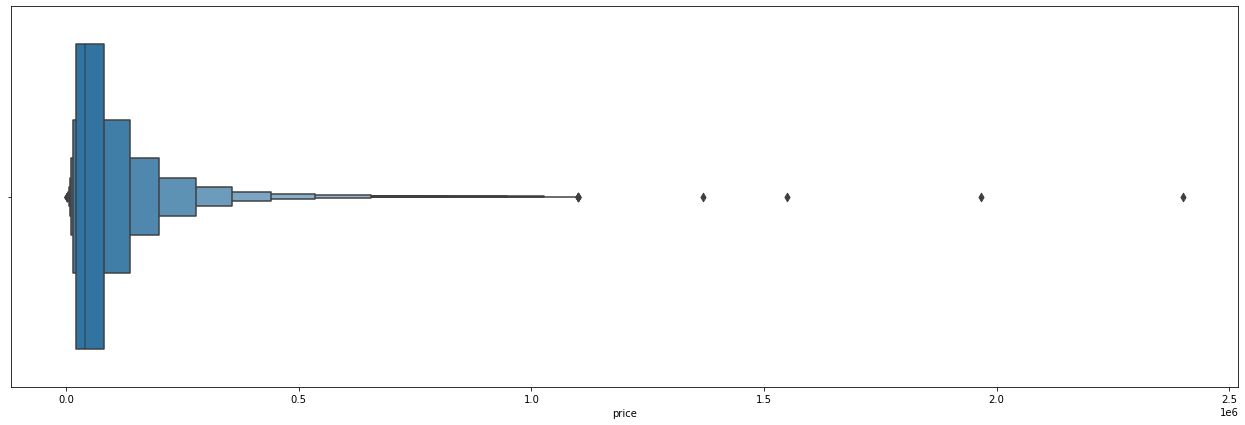

In [51]:
plt.figure(figsize=[22,7])
sns.boxenplot(data.price)
plt.show()

In [52]:
data[data['price']==data['price'].max()]  ## Checking the car with max price 

,mark,model,year,mileage,vol_engine,fuel,city,province,price
61836,mercedes-benz,s-klasa,2017,400,5980,Gasoline,Janki,Mazowieckie,2399900


In [53]:
data[data['price']==data['price'].min()]  ## Checking the car with min price 

,mark,model,year,mileage,vol_engine,fuel,city,province,price
38890,volkswagen,golf-plus,2007,300567,1598,Gasoline,Lubachowy,Świętokrzyskie,500


#### Correlation between variables

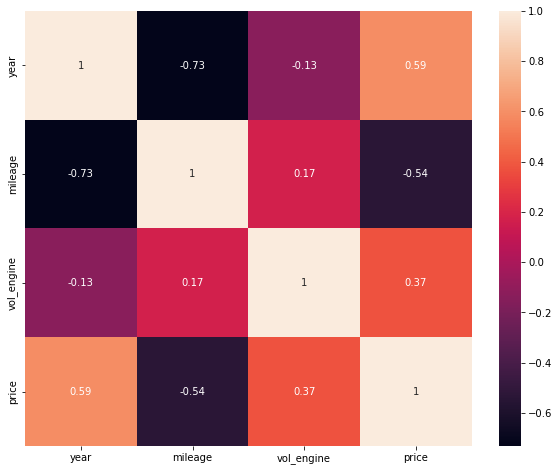

In [54]:
plt.figure(figsize=[10,8])
sns.heatmap(data.corr(),annot=True)
plt.show()

#### Saving data after analysis  

In [55]:
data.to_csv('Car_Prices_Poland_Kaggle_regression_project.csv')  ## Dataset after analysis will be used to regression models